In [20]:
%matplotlib inline 
import matplotlib.pylab as plt 
import numpy as np 
import seaborn as sns
sns.set_style('ticks')
default_colors = sns.color_palette()

import pandas as pd 

import CRISPR_Kinetic_model as Cas9
reload(Cas9);

In [116]:
model_id = 'init_limit_general_energies_v2'
filename = '../data/25_10_2018/median_landscape_Boyle.txt'
boyle_params = np.loadtxt(filename,comments='#')


rate_to_cleave=0.000001

In [98]:
fldr = '/Users/mklein1/Documents/PhD_Martin_Depken_Group/PredictionTool_CLV/data/'
Pattanayak = pd.read_excel(fldr+'Pattanayak_training_data/Pattanayak_Liu_NBT_2673_Data.xlsx')
concentration = '100nM'
PAM = 'NGG'

concentration = '100nM'
PAM = 'NGG'
Pattanayak = Pattanayak[(Pattanayak.Concentration == concentration) & 
                        (Pattanayak.PAM == PAM) & (Pattanayak.name == 'CLTA1')]
Pattanayak.name.unique()
single_mm = Pattanayak[(Pattanayak['target - MMcount'] == 1)]
single_mm = single_mm.groupby('target - MMpos').median()
single_mm.reset_index(inplace=True)

# single_mm.plot()
single_mm = single_mm[['target - MMpos', 'Score']]

single_mm['target - MMpos'] = single_mm['target - MMpos'].apply(int)

single_mm.sort_values('target - MMpos',inplace=True)



up_to_2_mm = Pattanayak[(Pattanayak['target - MMcount'] == 1) | (Pattanayak['target - MMcount'] == 2)]


In [117]:
OnTarget = Cas9.calc_Time(parameters=boyle_params,
                    mismatch_positions=[],
                    model_ID=model_id,
                    rate_to_cleave=rate_to_cleave,
                    rel_conc=10.0)

In [118]:
mm_positions = range(1,21)
TimeCLV = map(lambda x:Cas9.calc_Time(parameters=boyle_params,
                    mismatch_positions=[x],
                    model_ID=model_id,
                    rate_to_cleave=rate_to_cleave,
                    rel_conc=10.0) , mm_positions )


mismatch_positions =[]
Delta = Cas9.translate_binding_to_cleaving(boyle_params, model_id, rate_to_cleave, mismatch_positions)
landscape = Cas9.get_transition_landscape(Delta)
on_target = Cas9.Pclv(Delta)

ProbCLV = np.zeros(20)
for mm1 in range(20):
    mismatch_positions = [mm1+1]
    Delta = Cas9.translate_binding_to_cleaving(boyle_params, model_id, rate_to_cleave, mismatch_positions)
    landscape = Cas9.get_transition_landscape(Delta)
    ProbCLV[mm1] = Cas9.Pclv(Delta)/on_target

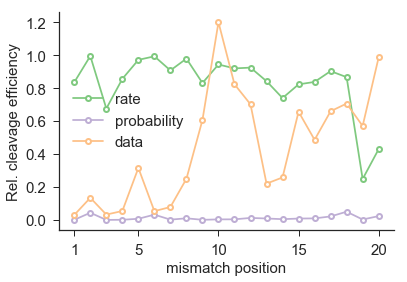

In [119]:
sns.set_palette('Accent');


TimeCLV = np.array(TimeCLV)
RelRate = (TimeCLV/OnTarget)**(-1)

plt.plot(mm_positions,RelRate,
                marker='o',
        markersize=5,
        markeredgewidth=2,
        markerfacecolor='white',
        label='rate')

plt.plot(range(1,21),ProbCLV,
        marker='o',
        markersize=5,
        markeredgewidth=2,
        markerfacecolor='white',
        label='probability')





plt.plot(single_mm['target - MMpos'], single_mm['Score'], 
        marker='o',
        markersize=5,
        markeredgewidth=2,
        markerfacecolor='white',
        label= 'data')



plt.legend(fontsize=15,frameon=True,ncol=2, bbox_to_anchor=(.15,.5,1,0.85))
plt.xticks([1,5,10,15,20],fontsize=15);
plt.yticks(fontsize=15);
plt.ylabel('Rel. cleavage efficiency', fontsize=15)
plt.xlabel('mismatch position', fontsize=15)
plt.legend(fontsize=15)
sns.despine()

/Users/mklein1/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


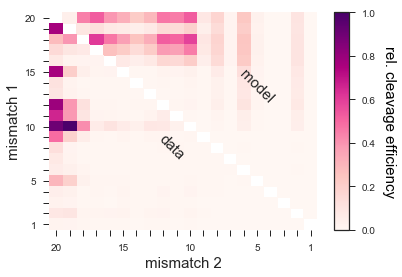

In [115]:
two_mismatches = np.zeros((20,20))
for mm1 in range(1,21):
    for mm2 in range(1,21):
        two_mismatches[mm1-1,mm2-1] = (Cas9.calc_Time(parameters=boyle_params,
                    mismatch_positions=[mm1,mm2],
                    model_ID=model_id,
                    rate_to_cleave=rate_to_cleave,
                    rel_conc=10.0)/OnTarget)**(-1)
    
        
        
axHeatmap = sns.heatmap(two_mismatches, mask=np.triu(two_mismatches),cbar=False, cmap='RdPu', vmin=0, vmax=1)





'''
Experiment
'''
x1 = np.arange(1,21)
x2 = np.arange(1,21)
two_mm = up_to_2_mm[Pattanayak['target - MMcount']==2].groupby('target - MMpos').median()
Matrix = np.zeros([20,20]) 
for name in two_mm.index:
    pos1 = int(str(name).split(',')[0]) -1
    pos2 = int(str(name).split(',')[1]) -1 
    Matrix[pos1,pos2] = two_mm.loc[name]['Score']   
mask = np.zeros(Matrix.shape)
mask[np.tril_indices_from(mask)] = True
axHeatmap = sns.heatmap(Matrix,cbar=False,mask=mask,cmap='RdPu',vmin=0,vmax=1)


axHeatmap.invert_xaxis()
axHeatmap.invert_yaxis()
axHeatmap.set_yticklabels([20,'','','','',
                           15,'','','','',
                           10,'','','','',
                           5,'','','',
                           1] );
axHeatmap.set_xticklabels([1,'','','',
                           5,'','','','',
                           10,'','','','',
                           15,'','','','',
                           20] ,rotation=0);

axHeatmap.set_ylabel('mismatch 1',fontsize=15);
axHeatmap.set_xlabel('mismatch 2',fontsize=15);

cbar = axHeatmap.figure.colorbar(axHeatmap.axes.collections[0],aspect=15);
cbar.set_label('rel. cleavage efficiency',size=15,rotation=-90,labelpad=20,color='black')


axHeatmap.text(x=6.,y=6., s='model',rotation=-45,fontsize=15)
axHeatmap.text(x=12.,y=12., s='data',rotation=-45,fontsize=15)

In [120]:
Pattanayak

,guide,target,site_type,PAM,PAM - MMcount,target - MMcount,target - MMpos,target - MMseq,Enrichment,Score,name,Concentration
0,AGTCCTCATCTCCCTCAAGCGG,AGTCCTCATCTCCCTCAAGCGG,ON,NGG,0,0,0,NaN,9.967317,1.000000,CLTA1,100nM
1,AGTCCTCATCTCCCTCAAGCGG,AGTCCTCATCTCCCTCACGCGG,Off,NGG,0,1,3,A:C,0.092771,0.009307,CLTA1,100nM
2,AGTCCTCATCTCCCTCAAGCGG,AGTCCTCATCTCCCTCAGGCGG,Off,NGG,0,1,3,A:G,0.326987,0.032806,CLTA1,100nM
3,AGTCCTCATCTCCCTCAAGCGG,AGTCCTCATCTCCCTCATGCGG,Off,NGG,0,1,3,A:T,0.429263,0.043067,CLTA1,100nM
4,AGTCCTCATCTCCCTCAAGCGG,AGTCCTCATCTCCCTCAAACGG,Off,NGG,0,1,2,G:A,1.342347,0.134675,CLTA1,100nM
5,AGTCCTCATCTCCCTCAAGCGG,AGTCCTCATCTCCCTCAACCGG,Off,NGG,0,1,2,G:C,0.316409,0.031745,CLTA1,100nM
6,AGTCCTCATCTCCCTCAAGCGG,AGTCCTCATCTCCCTCAATCGG,Off,NGG,0,1,2,G:T,1.526206,0.153121,CLTA1,100nM
7,AGTCCTCATCTCCCTCAAGCGG,AGTCCTCATCTCCCTCAAGAGG,Off,NGG,0,1,1,C:A,0.305404,0.030641,CLTA1,100nM
8,AGTCCTCATCTCCCTCAAGCGG,AGTCCTCATCTCCCTCAAGGGG,Off,NGG,0,1,1,C:G,0.051966,0.005214,CLTA1,100nM
9,AGTCCTCATCTCCCTCAAGCGG,AGTCCTCATCTCCCTCAAGTGG,Off,NGG,0,1,1,C:T,0.524958,0.052668,CLTA1,100nM


In [ ]:
'AGTCCTCATCTCCCTCAAGC'
'GACGCATAAAGATGAGACGC'